In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#Step 1 Generate Data
#Load data from sklearn library
X, y = make_regression(n_samples=500, n_features=10, noise=25.8, random_state=0)
print(X.shape, y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [5]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [6]:
#Step 2  Normalize Data
def normalize_data(X):
    u = X.mean(axis=0)  #calculate mean of columns
    std = X.std(axis=0)  #calculate standard deviation of columns
    return (X - u) / std

In [7]:
X = normalize_data(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
1,1.013719,-1.152930,-0.728991,-1.520305,-0.227862,-0.079490,1.047138,0.337413,-0.222377,-2.028019
2,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
3,-0.962820,1.934780,1.870636,0.368813,-0.117338,1.015666,0.995061,-0.109551,0.358586,2.323878
4,-0.143907,0.593310,-1.207684,0.229233,0.839718,0.821459,-0.030363,2.111820,1.313428,-1.135732


In [8]:
X.mean(axis=0)

array([-1.24344979e-17, -4.39648318e-17, -1.28785871e-17, -2.44249065e-17,
        3.77475828e-18, -3.87467836e-17,  3.31401573e-17, -1.64313008e-17,
        5.46229728e-17, -9.17044218e-17])

In [9]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

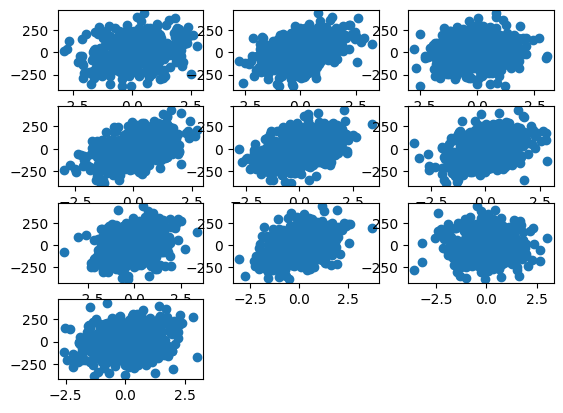

In [10]:
#Step 3 Visualize  y as function of each feature
for f in range(0,10):
    plt.subplot(4,3,f+1)
    plt.scatter(X[:,f], y)
plt.show()

In [11]:
#Step 4 Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 10) (350,)
(150, 10) (150,)


In [13]:
#Step 5 Preprocess Data Add Dummy column of 1'set
def preprocess(X):
    #add column of 1's in matrix as 0th column
    if X.shape[1]==n_features:
        m = X.shape[0]  #number of rows
        ones = np.ones((m, 1))
        X = np.hstack((ones, X))
    return X

In [16]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
1,1.013719,-1.152930,-0.728991,-1.520305,-0.227862,-0.079490,1.047138,0.337413,-0.222377,-2.028019
2,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
3,-0.962820,1.934780,1.870636,0.368813,-0.117338,1.015666,0.995061,-0.109551,0.358586,2.323878
4,-0.143907,0.593310,-1.207684,0.229233,0.839718,0.821459,-0.030363,2.111820,1.313428,-1.135732


In [20]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)
# pd.DataFrame(X_train).head()
print(X_train.shape, X_test.shape)

(350, 11) (150, 11)


In [21]:
#Step 5 Modelling / Linear Regression with Multiple Features
def hypothesis(X, theta):
    return np.dot(X, theta)  #faster from loop

def loss(X, y, theta):
    yp = hypothesis(X, theta)
    error = np.mean((yp - y) ** 2)
    return error

def gradient_descent(X, y, theta):
    yp = hypothesis(X, theta)
    grad = np.dot(X.T, (yp - y))
    m = X.shape[0]  #number of samples
    return grad / m

def train(X, y, learning_rate=0.1, iterations=100):
    n = X.shape[1]  #number of features
    theta = np.random.rand(n)  #initialize theta with random values
    error_list = []
    
    for i in range(iterations):
        error = loss(X, y, theta)
        grad = gradient_descent(X, y, theta)
        theta = theta - learning_rate * grad
        error_list.append(error)

    plt.plot(error_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss vs. Iterations")
    plt.show()
    return theta


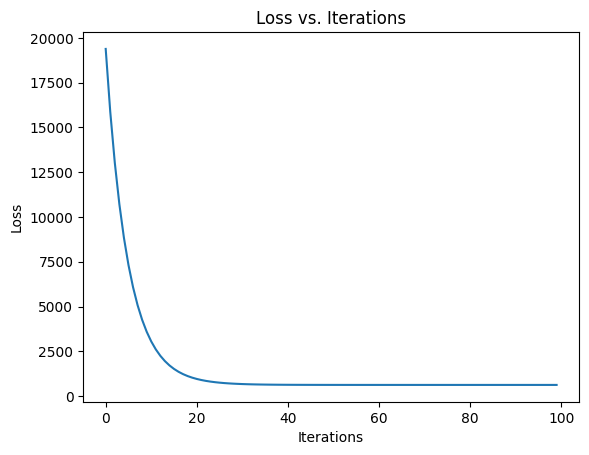

[-6.92549135 29.1820387  59.47605134 11.81428029 63.33189261 55.82874004
 48.34209334 41.47781424 56.56059448  3.15127049 26.14090408]


In [22]:
theta = train(X_train, y_train, learning_rate=0.1, iterations=100)
print( theta)

In [41]:
def r2score(y, yp):
    ymean = y.mean()
    num = np.sum((y - yp) ** 2)
    denom = np.sum((y - ymean) ** 2)
    return (1 - (num / denom))*100

In [42]:
yp = hypothesis(X_test, theta)

In [43]:
r2score(y_test,yp)

np.float64(96.81362420589946)

In [46]:
#Linear regression with sklearn
model = LinearRegression()


In [47]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred.shape

(150,)

In [50]:
model.score(X_test, y_test)

0.9681374972467289

In [51]:
model.intercept_ #theta_0

np.float64(-6.9255285974757275)

In [52]:
model.coef_ 

array([ 0.        , 29.18431425, 59.4731423 , 11.81465189, 63.33793453,
       55.83361029, 48.35285523, 41.48020198, 56.56212365,  3.14799682,
       26.1451649 ])